In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Brand,Model,Size,Smart,Seller,Price
0,Next,YE-40020D2,40,0,DALOGLUDİGİTAL,2702.00
1,Navigold,NG-1930,19,0,naviprime,1377.50
2,TCL,55C728,55,1,Comfor,14399.04
3,Vestel,32FA9500,32,1,OrhanMob-Vestel-YOB,3087.04
4,Woon,WN49DAL08/0202,49,0,DijiSepet,4052.04
...,...,...,...,...,...,...
1110,Regal,55R753U,55,1,RegalKurumsalMağaza,7839.02
1111,Vestel,43Q9900,43,1,VestelKurumsalMağaza,8973.54
1112,Vestel,43F9510,43,1,VestelKurumsalMağaza,6049.00
1113,Vestel,55UA9600,55,1,VestelKurumsalMağaza,8329.02


In [4]:
df['Brand'].value_counts()

Vestel        225
Samsung       201
LG            124
Philips        73
Regal          71
Sony           44
TCL            44
Sunny          40
Onvo           33
Toshiba        30
Altus          29
Nordmende      22
Saba           20
Next           16
Skytech        15
Axen           15
Techwood       12
Awox           11
Telenova       11
Profilo        10
Beko           10
Telefunken      9
Dijitsu         6
Telefox         5
Hi-Level        5
Finlux          4
Jvc             4
Blaupunkt       4
Woon            4
Arçelik         2
Navigold        2
Nexon           2
Botech          2
Digipoll        2
Grundig         2
Weston          1
Elton           1
Hitachi         1
DijiTv          1
Dextel          1
ELTON           1
Name: Brand, dtype: int64

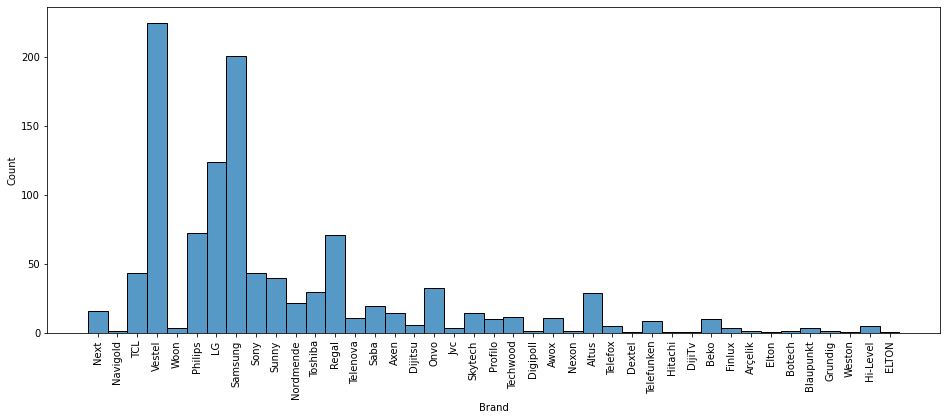

In [5]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='Brand')
plt.xticks(rotation = 90);

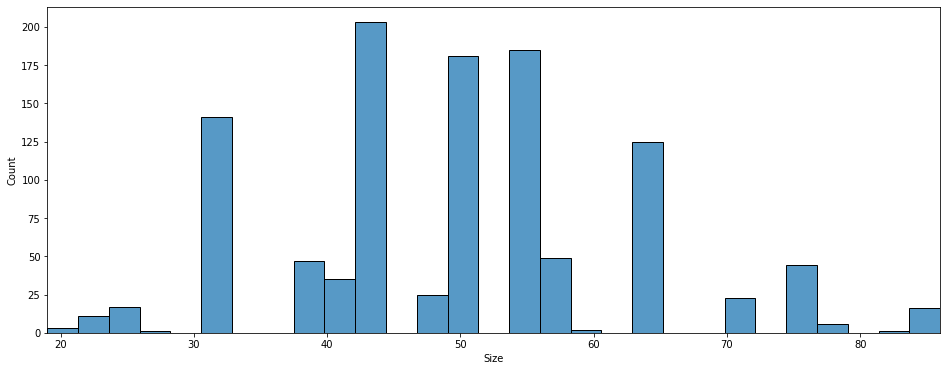

In [6]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='Size')
plt.xlim(19,86);

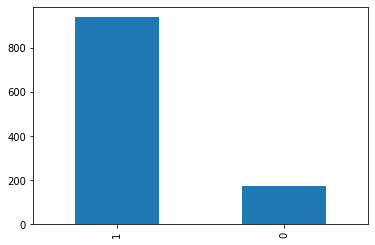

In [7]:
df['Smart'].value_counts().plot(kind='bar');

In [8]:
df['Model'].value_counts()

55UA9600      12
55U9500       12
UE32T5300     11
UE40T5300     10
UE50AU8000    10
              ..
43S65A         1
43R604F        1
DJTV321        1
QE55LS01T      1
QE75QN90       1
Name: Model, Length: 482, dtype: int64

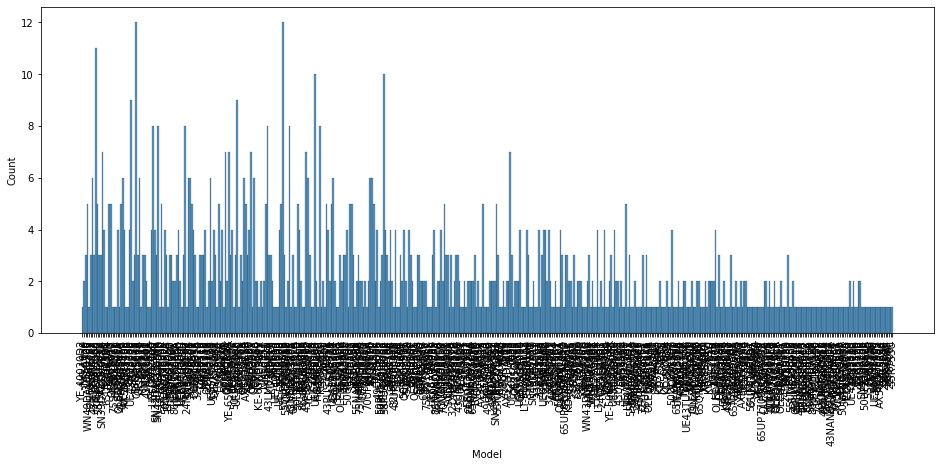

In [9]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='Model')
plt.xticks(rotation = 90);

In [10]:
df['Seller'].value_counts()

Tekno11                36
Simport-Vestel-YOB     35
incehesap              31
Avrupa                 29
OrhanMob-Vestel-YOB    28
                       ..
YıldızMarkt             1
ProfiloAnkara           1
cepmarketin             1
fırsatdiyarım           1
ERDALEV                 1
Name: Seller, Length: 188, dtype: int64

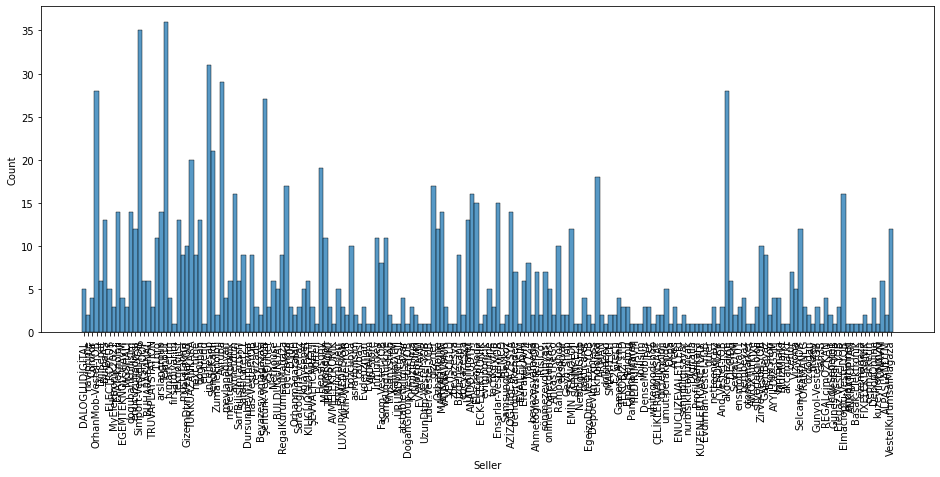

In [11]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x='Seller')
plt.xticks(rotation = 90);

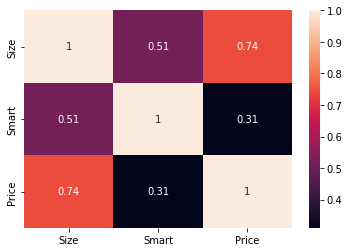

In [12]:
sns.heatmap(df.corr(),annot=True);

- Convert categorical values to numerical values

In [13]:
# There are so many different models and there isn't a distribution. So I will drop the Models column too.
# To reduce model complexity I will also drop Seller column.
X = df.drop(['Price', 'Model', 'Seller'],axis=1)
y = df['Price']

In [14]:
X = pd.get_dummies(X)

In [15]:
X.shape

(1115, 43)

## Train and Test Split

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=101)

## Linear Regression

In [17]:
lin_model = linear_model.LinearRegression()

In [18]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [19]:
lin_pred = lin_model.predict(X_test)

In [20]:
metrics.mean_absolute_error(y_test, lin_pred)

3504.2566955736497

In [21]:
X_train_columns = pd.DataFrame(X_train.columns, columns=['feature'] )

In [22]:
coef = pd.DataFrame(lin_model.coef_,columns=['coef'])

In [23]:
coef.join(X_train_columns).sort_values(by='coef', ascending=False)

,coef,feature
32,1.023526e+04,Brand_Sony
21,5.233991e+03,Brand_Navigold
9,5.020241e+03,Brand_Dextel
30,4.555248e+03,Brand_Samsung
20,4.470276e+03,Brand_LG
14,3.101264e+03,Brand_Elton
8,2.668805e+03,Brand_Botech
3,2.109551e+03,Brand_Arçelik
34,8.379298e+02,Brand_TCL
16,6.524340e+02,Brand_Grundig


## Logistic Regression

- Now try to guess whether Tv is smart or not

In [24]:
df

,Brand,Model,Size,Smart,Seller,Price
0,Next,YE-40020D2,40,0,DALOGLUDİGİTAL,2702.00
1,Navigold,NG-1930,19,0,naviprime,1377.50
2,TCL,55C728,55,1,Comfor,14399.04
3,Vestel,32FA9500,32,1,OrhanMob-Vestel-YOB,3087.04
4,Woon,WN49DAL08/0202,49,0,DijiSepet,4052.04
...,...,...,...,...,...,...
1110,Regal,55R753U,55,1,RegalKurumsalMağaza,7839.02
1111,Vestel,43Q9900,43,1,VestelKurumsalMağaza,8973.54
1112,Vestel,43F9510,43,1,VestelKurumsalMağaza,6049.00
1113,Vestel,55UA9600,55,1,VestelKurumsalMağaza,8329.02


In [25]:
X_log = df.drop(['Model', 'Smart', 'Seller'], axis=1)
y_log = df['Smart']

In [26]:
X_log = pd.get_dummies(X_log)

In [27]:
X_train_log, X_test_log, y_train_log, y_test_log = model_selection.train_test_split(X_log, y_log, test_size=0.2, random_state=101)

In [28]:
log_model = linear_model.LogisticRegression(
    penalty = 'l2',
    solver = 'lbfgs'
)

In [29]:
log_model.fit(X_train_log, y_train_log)

LogisticRegression()

In [30]:
log_pred = log_model.predict(X_test_log)

In [31]:
metrics.confusion_matrix(y_test_log, log_pred)

array([[ 22,  12],
       [  6, 183]], dtype=int64)

In [32]:
print(metrics.classification_report(y_test_log, log_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.94      0.97      0.95       189

    accuracy                           0.92       223
   macro avg       0.86      0.81      0.83       223
weighted avg       0.92      0.92      0.92       223



## Decision Tree

In [33]:
dt_model = tree.DecisionTreeClassifier(
    max_depth = 5,
    min_samples_split = 4,
    min_samples_leaf = 4,
    max_features = None,
    max_leaf_nodes = None,
)
# To avoid overfitting

In [34]:
dt_model.fit(X_train_log, y_train_log)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [35]:
dt_pred = dt_model.predict(X_test_log)

In [36]:
metrics.confusion_matrix(y_test_log, dt_pred)

array([[ 23,  11],
       [ 10, 179]], dtype=int64)

In [37]:
print(metrics.classification_report(y_test_log, dt_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        34
           1       0.94      0.95      0.94       189

    accuracy                           0.91       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.90      0.91      0.91       223



In [38]:
dt_model.classes_

array([0, 1], dtype=int64)

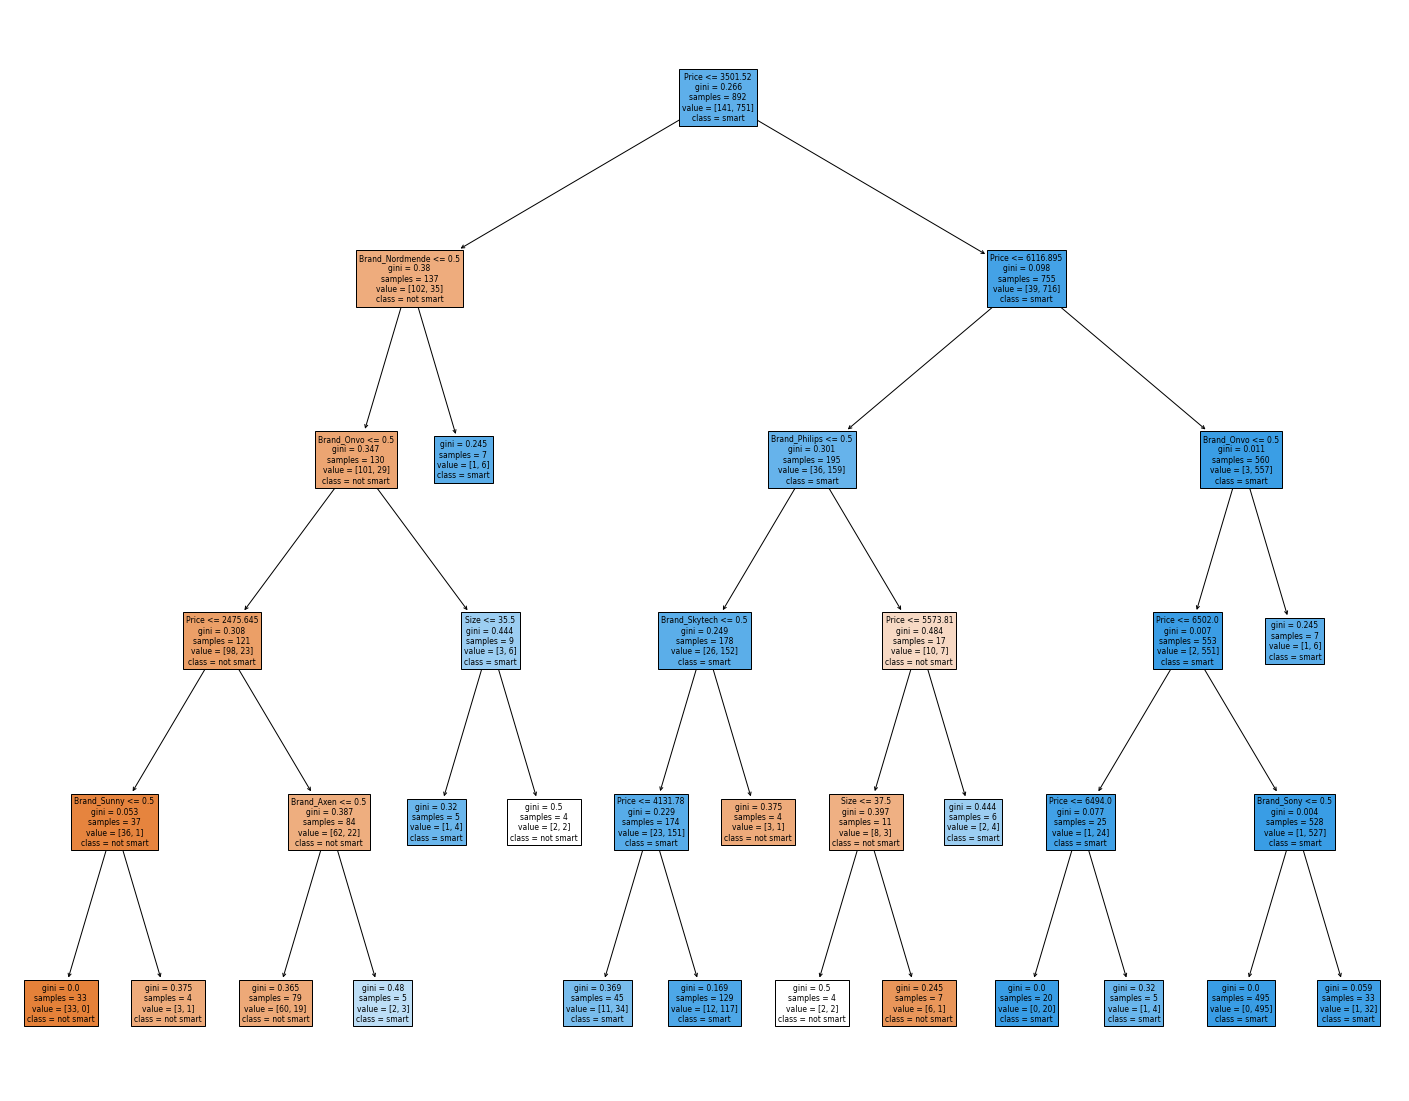

In [39]:
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names = X_train_log.columns,  
                   class_names = ['not smart', 'smart'],
                   filled=True)

## Random Forest

In [40]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators = 100,
    max_depth = 5,
    min_samples_split = 4,
    min_samples_leaf = 4,
    bootstrap = True,
)

In [41]:
rf_model.fit(X_train_log, y_train_log)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [42]:
rf_pred = rf_model.predict(X_test_log)

In [43]:
metrics.confusion_matrix(y_test_log, rf_pred)

array([[ 22,  12],
       [  6, 183]], dtype=int64)

In [44]:
print(metrics.classification_report(y_test_log, rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71        34
           1       0.94      0.97      0.95       189

    accuracy                           0.92       223
   macro avg       0.86      0.81      0.83       223
weighted avg       0.92      0.92      0.92       223



In [45]:
# Random forest has the best scores among Logistic Regression, Decision Tree and Random Forest.